# Cardio Good Fitness Project
The following serves as an analysis on the customer base of Cardio Good Fitness

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

### Uploading data and sanity checks

In [84]:
raw_data = pd.read_csv('CardioGoodFitness.csv')
raw_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [85]:
raw_data.info() #No missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [86]:
raw_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Since all values are either discreet or categorical, it merits checking what are the unique values for each variable for future ease of organization

In [87]:
columns = raw_data.columns.to_list()
[print('The unique values for ',x,' are: ',raw_data[x].unique().tolist()) for x in columns]


The unique values for  Product  are:  ['TM195', 'TM498', 'TM798']
The unique values for  Age  are:  [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42]
The unique values for  Gender  are:  ['Male', 'Female']
The unique values for  Education  are:  [14, 15, 12, 13, 16, 18, 20, 21]
The unique values for  MaritalStatus  are:  ['Single', 'Partnered']
The unique values for  Usage  are:  [3, 2, 4, 5, 6, 7]
The unique values for  Fitness  are:  [4, 3, 2, 1, 5]
The unique values for  Income  are:  [29562, 31836, 30699, 32973, 35247, 37521, 36384, 38658, 40932, 34110, 39795, 42069, 44343, 45480, 46617, 48891, 53439, 43206, 52302, 51165, 50028, 54576, 68220, 55713, 60261, 67083, 56850, 59124, 61398, 57987, 64809, 47754, 65220, 62535, 48658, 54781, 48556, 58516, 53536, 61006, 57271, 52291, 49801, 62251, 64741, 70966, 75946, 74701, 69721, 83416, 88396, 90886, 92131, 77191, 52290, 85906, 103336, 99601, 89641, 95866, 104581

[None, None, None, None, None, None, None, None, None]

## Univariate Analysis

#### Distributions in percentages

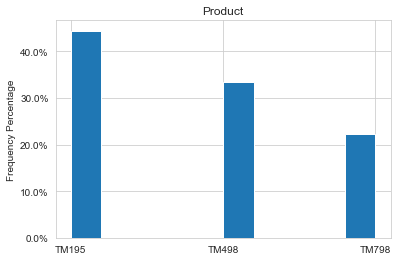

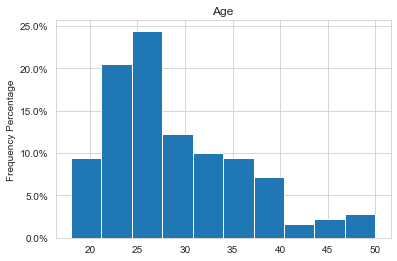

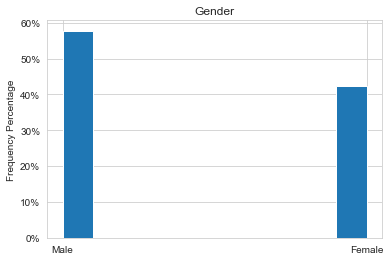

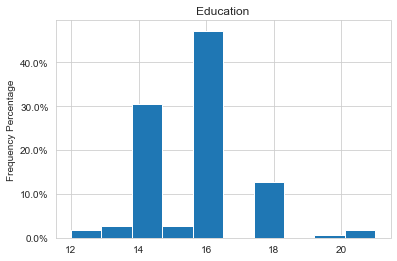

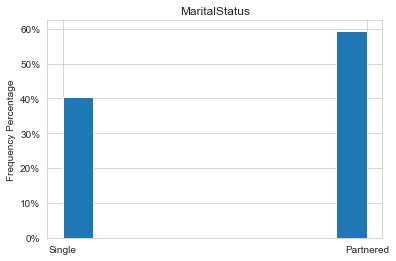

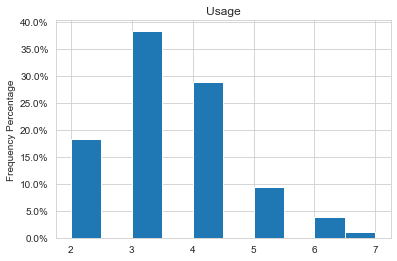

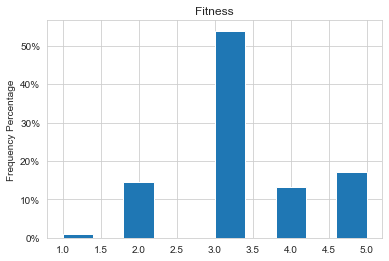

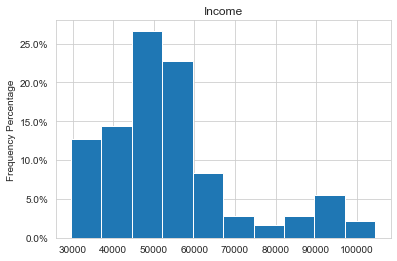

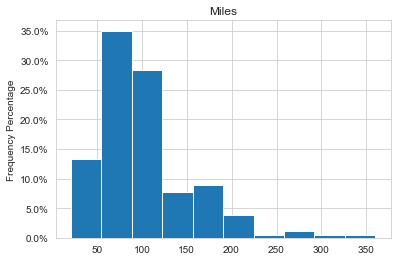

In [88]:
for x in columns:
    raw_data[str(x)].hist(weights=np.ones(len(raw_data[str(x)])) / len(raw_data[str(x)]))
    plt.title(x)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.ylabel('Frequency Percentage')
    plt.show()



In [89]:
# To start to manipulate the data safely, its worth moving data to a copy.
data_manip = raw_data.copy()

In [90]:
# To see the spread of numerical data, we select those. (Diff. df for organization)
data_numericals = data_manip.select_dtypes(include=[np.number])

data_numericals.head()

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47


#### Distributions for numerical variables to determine presence of outliers

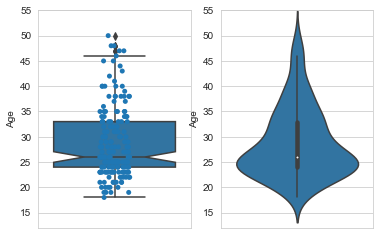

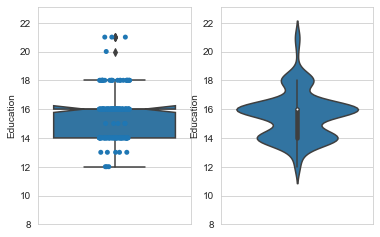

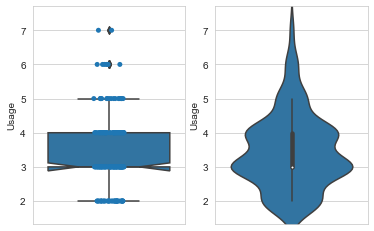

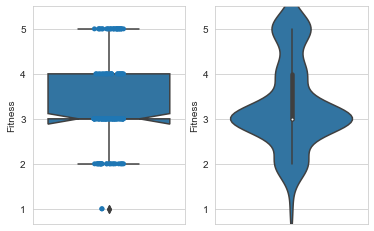

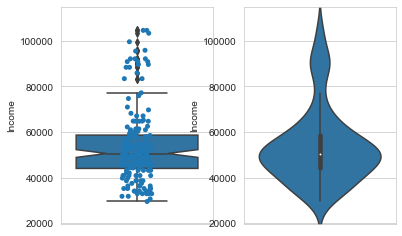

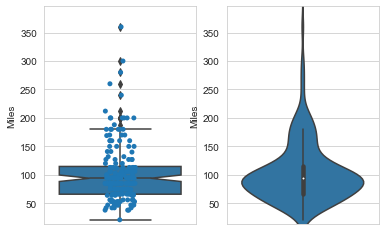

In [91]:
for n in data_numericals.columns:
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(1, 2)
    _ylim = (min(data_numericals[n].values)/1.5,max(data_numericals[n].values)*1.1)
    plt.setp(axes, ylim=_ylim)
    sns.boxplot(y = data_numericals[n],notch=True,ax = axes[0])
    sns.stripplot(y = data_numericals[n],ax=axes[0])
    sns.violinplot(y= data_numericals[n],ax=axes[1])
    plt.show()

Upon observing the data, we can see that some numerical variables may contain outliers. While the distribution of the outliers seem to follow the behavior of a valid distribution tail, it is worth check the lower and upper outer fences and see if any of these are "extreme outliers".

The quantile values for 25, 50 and 75 percentiles respectively for  Age  are given by:
0.25    24.0
0.50    26.0
0.75    33.0
Name: Age, dtype: float64
Resulting in an IQR of: 9.0
Leading to the respective lower and upper outer fences of -3.0 and 60.0


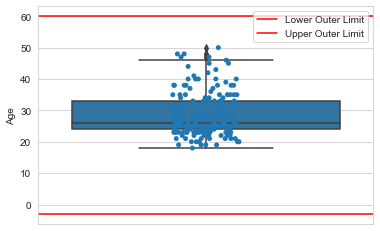

The quantile values for 25, 50 and 75 percentiles respectively for  Education  are given by:
0.25    14.0
0.50    16.0
0.75    16.0
Name: Education, dtype: float64
Resulting in an IQR of: 2.0
Leading to the respective lower and upper outer fences of 8.0 and 22.0


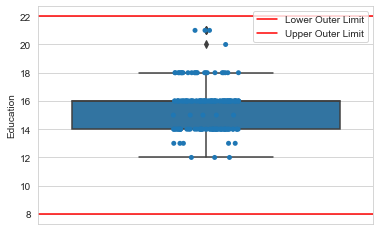

The quantile values for 25, 50 and 75 percentiles respectively for  Usage  are given by:
0.25    3.0
0.50    3.0
0.75    4.0
Name: Usage, dtype: float64
Resulting in an IQR of: 1.0
Leading to the respective lower and upper outer fences of 0.0 and 7.0


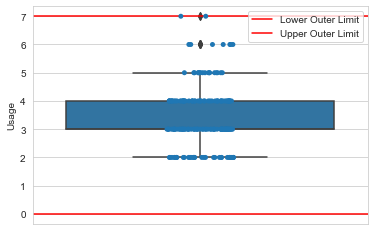

The quantile values for 25, 50 and 75 percentiles respectively for  Fitness  are given by:
0.25    3.0
0.50    3.0
0.75    4.0
Name: Fitness, dtype: float64
Resulting in an IQR of: 1.0
Leading to the respective lower and upper outer fences of 0.0 and 7.0


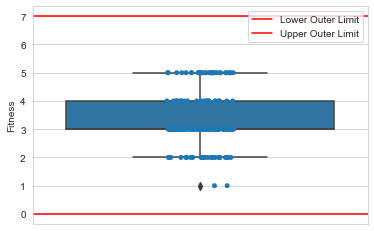

The quantile values for 25, 50 and 75 percentiles respectively for  Income  are given by:
0.25    44058.75
0.50    50596.50
0.75    58668.00
Name: Income, dtype: float64
Resulting in an IQR of: 14609.25
Leading to the respective lower and upper outer fences of 231.0 and 102495.75


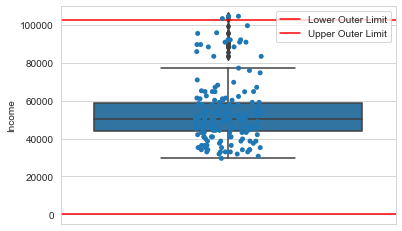

The quantile values for 25, 50 and 75 percentiles respectively for  Miles  are given by:
0.25     66.00
0.50     94.00
0.75    114.75
Name: Miles, dtype: float64
Resulting in an IQR of: 48.75
Leading to the respective lower and upper outer fences of -80.25 and 261.0


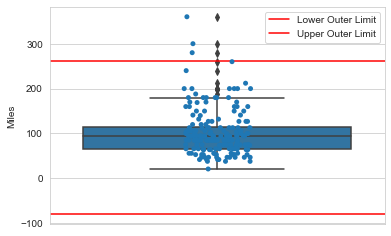

In [92]:
for n in data_numericals.columns:
    quantile_data = data_numericals[n].quantile([0.25,0.5,0.75])
    IQR = max(quantile_data.values)-min(quantile_data.values)
    low_out = min(quantile_data.values)-3*IQR
    upper_out = max(quantile_data.values)+3*IQR
    print('The quantile values for 25, 50 and 75 percentiles respectively for ',n,' are given by:')
    print(quantile_data)
    print('Resulting in an IQR of: '+str(IQR))
    print('Leading to the respective lower and upper outer fences of '+str(low_out)+' and '+str(upper_out))
    sns.boxplot(y = data_numericals[n])
    sns.stripplot(y = data_numericals[n])
    plt.axhline(y = low_out, color = 'r', linestyle = '-',label='Lower Outer Limit')
    plt.axhline(y = upper_out, color = 'r', linestyle = '-',label='Upper Outer Limit')
    plt.legend(bbox_to_anchor = (1.0, 1),loc = 'upper right')
    plt.show()


Given than some numerical data falls outside the lower and upper fences, I would suggest these be treated as extreme outliers but given then distribution of the data, I would choose to substitute them for the median (versus the mean).

In [94]:
data_num_sansout = data_numericals.copy()

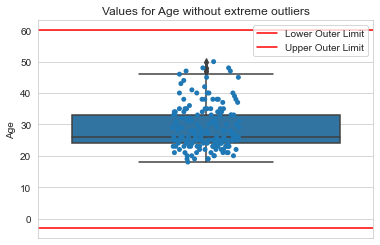

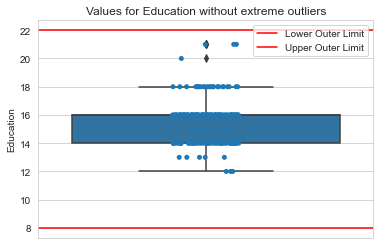

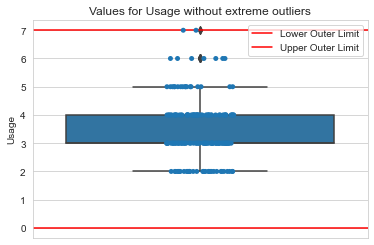

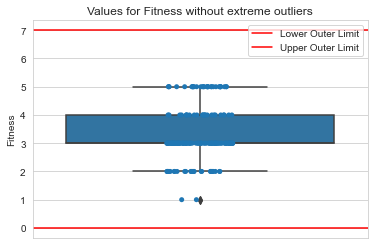

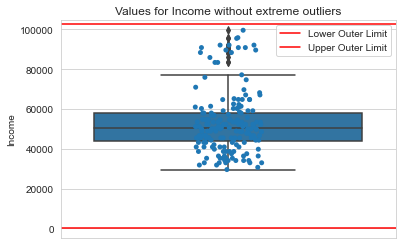

c:\Users\gelso\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


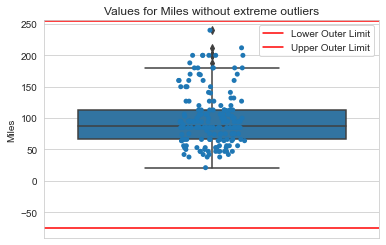

In [96]:
for n in data_num_sansout.columns:
    quantile_data = data_num_sansout[n].quantile([0.25,0.5,0.75])
    IQR = max(quantile_data.values)-min(quantile_data.values)
    low_out = min(quantile_data.values)-3*IQR
    upper_out = max(quantile_data.values)+3*IQR
    data_num_sansout[n].iloc[(data_num_sansout[n]>upper_out)|(data_num_sansout[n]<low_out)] = np.median(data_num_sansout[n].values)
    
    sns.boxplot(y = data_num_sansout[n])
    sns.stripplot(y = data_num_sansout[n])
    plt.axhline(y = low_out, color = 'r', linestyle = '-',label='Lower Outer Limit')
    plt.axhline(y = upper_out, color = 'r', linestyle = '-',label='Upper Outer Limit')
    plt.legend(bbox_to_anchor = (1.0, 1),loc = 'upper right')
    plt.title('Values for '+n+' without extreme outliers')
    plt.show() 


In [98]:
for y in data_num_sansout.columns:
    data_manip[y]=data_num_sansout[y]

In [100]:
data_manip.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562.0,112.0
1,TM195,19,Male,15,Single,2,3,31836.0,75.0
2,TM195,19,Female,14,Partnered,4,3,30699.0,66.0
3,TM195,19,Male,12,Single,3,3,32973.0,85.0
4,TM195,20,Male,13,Partnered,4,2,35247.0,47.0


In the case that a model design would be desired, the data is clean from extreme outliers. It might not be a relevant effort for the scope of this analysis.

## Multivariate Analysis

In [170]:
#To be able to appreciate the pairwise correlations of all the data, columns with strings values
# will be turned into numerical codes

for x in columns:
    if type(data_manip[x][0])==str:
        index_map = data_manip[x].unique()
        print(pd.Series(index_map))
        indx = 0
        for i in index_map:
            data_manip.loc[data_manip[x]==i,x]=indx
            indx+=1


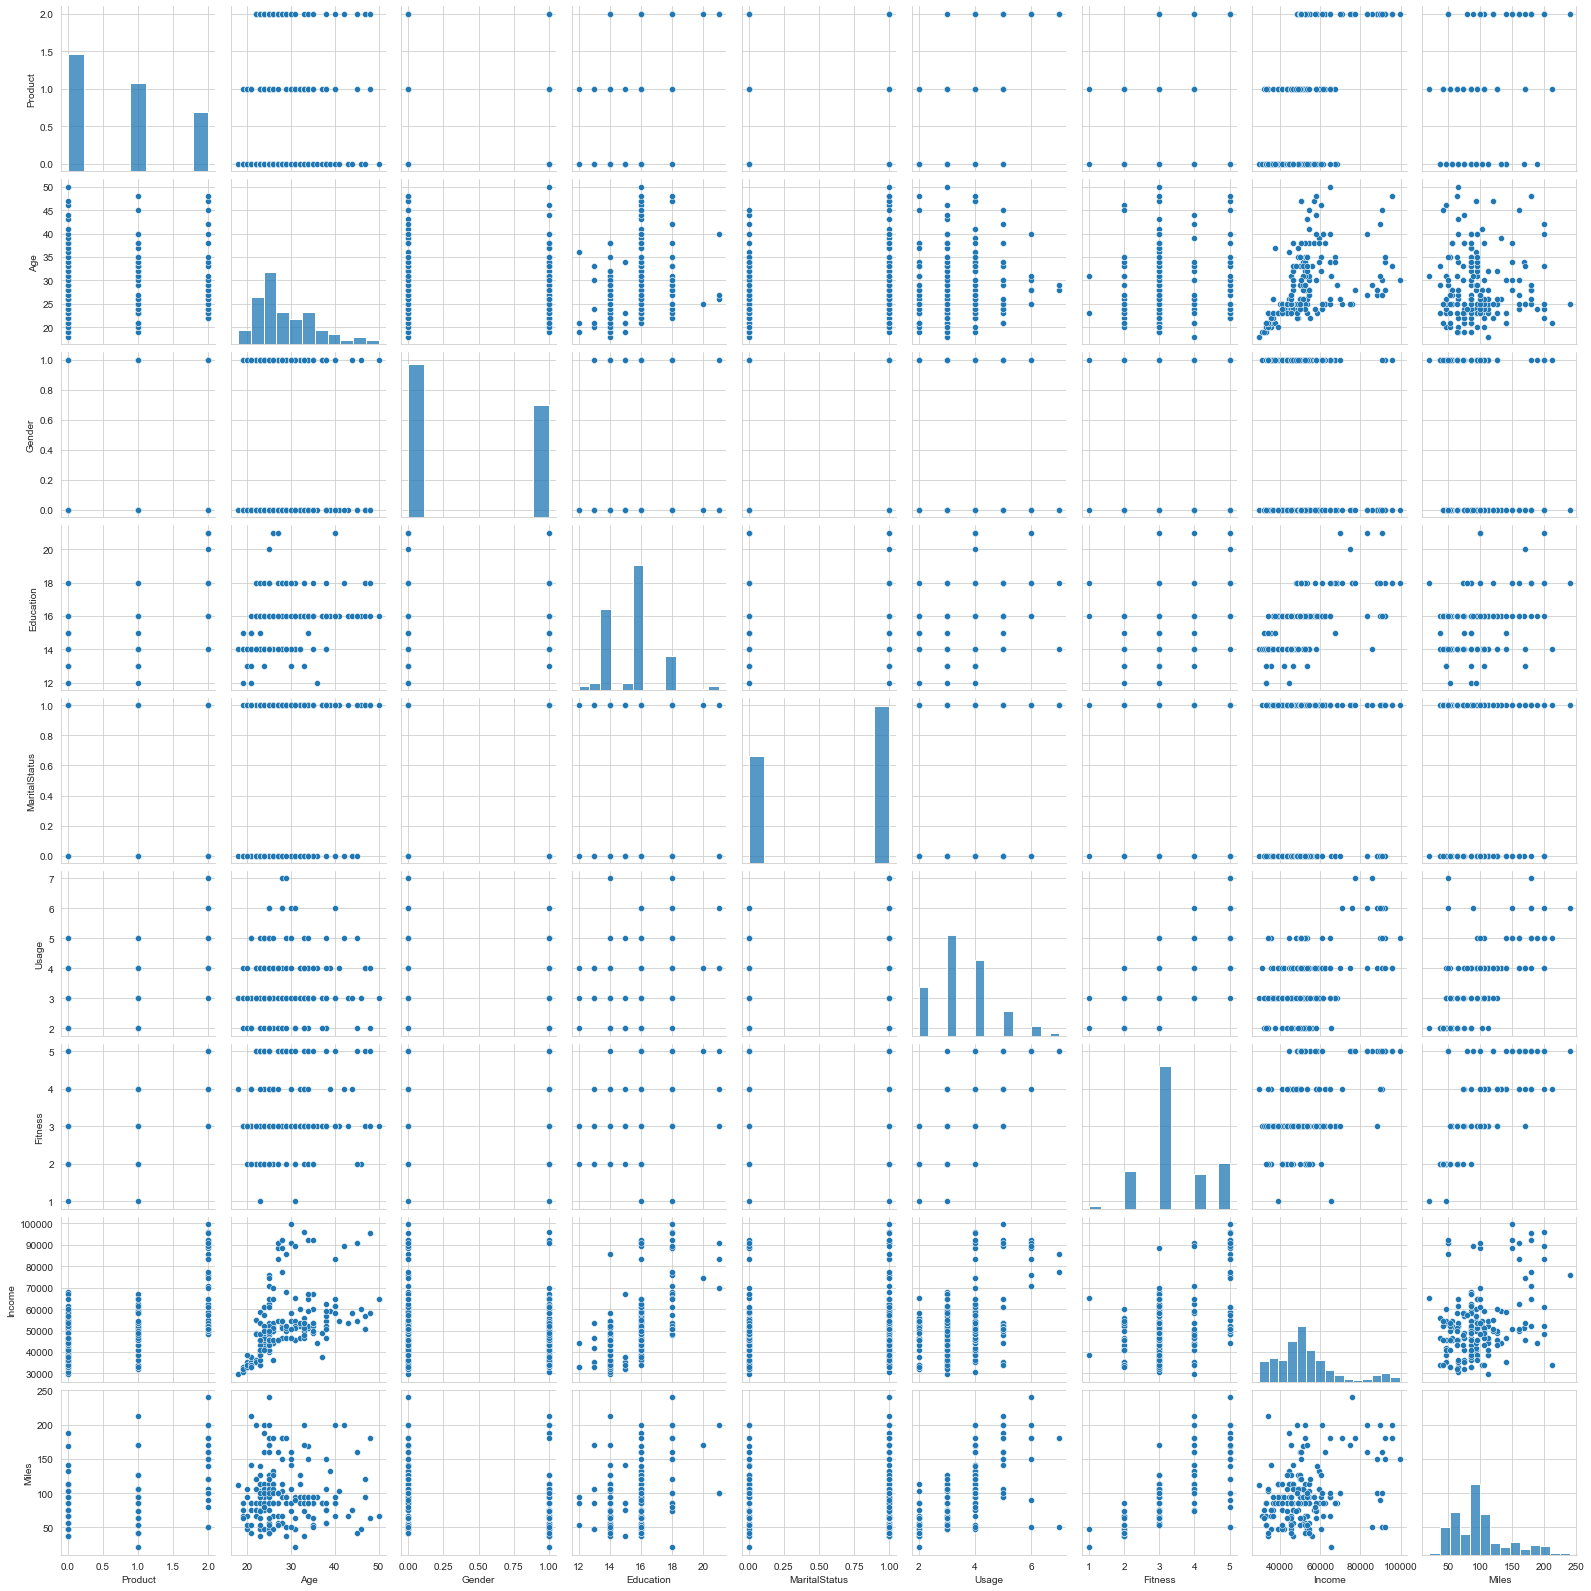

In [109]:
#What correlations are there between pairwise comparisons of variables?
sns.pairplot(data_manip)

At first glance, there are some interesting multivariate qualities to explore:
#### Relations to explore related to: Product
- The third product seems to be more frequently purchased by people with higher incomes
- The third product is the least bought and the most used
- The third product seems to also be correlated with higher fitness levels

#### Relations to explore related to: Marital Status
- Usage and Miles have (as expected) a positive correlation. Furthermore, Marital Status seems to have a positive relation with miles, but this relation is not captured when observing usage (explore)
- 60% of users are partnered.
  - Is it because they have more disposable income or because it's a targeted market?

#### Relations to explore related to: Income
- When observing usage in the form of miles, the data seems to cluster between modest income/low miles and high income

## Multivariate analysis focusing on individual products with variables of interest

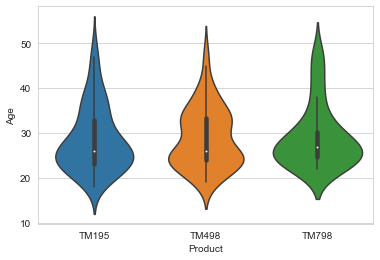

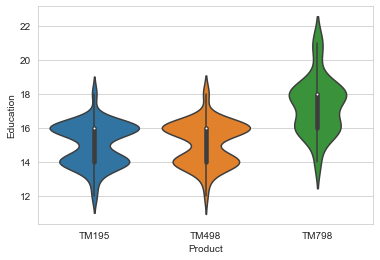

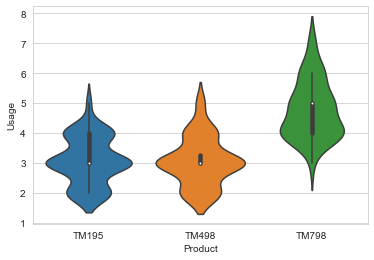

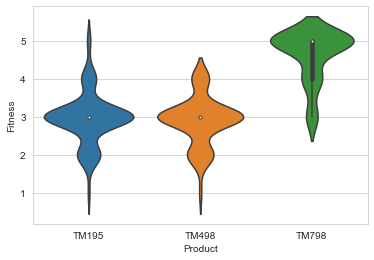

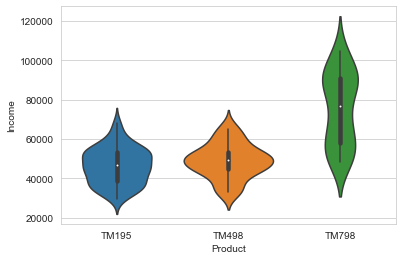

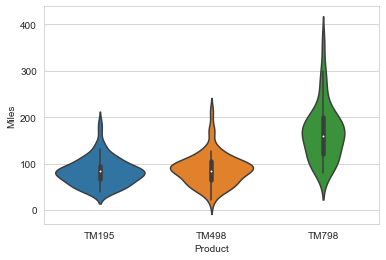

In [111]:
for t in data_num_sansout.columns:
    sns.violinplot(data=raw_data,x='Product',y=t)
    plt.show()

There seems to be a pattern emerging. Grouping variables might elucidate further:

In [125]:
[print(raw_data.groupby(['Product',t])[t].count()) for t in ['Gender','MaritalStatus']]

Product  Gender
TM195    Female    40
         Male      40
TM498    Female    29
         Male      31
TM798    Female     7
         Male      33
Name: Gender, dtype: int64
Product  MaritalStatus
TM195    Partnered        48
         Single           32
TM498    Partnered        36
         Single           24
TM798    Partnered        23
         Single           17
Name: MaritalStatus, dtype: int64


[None, None]

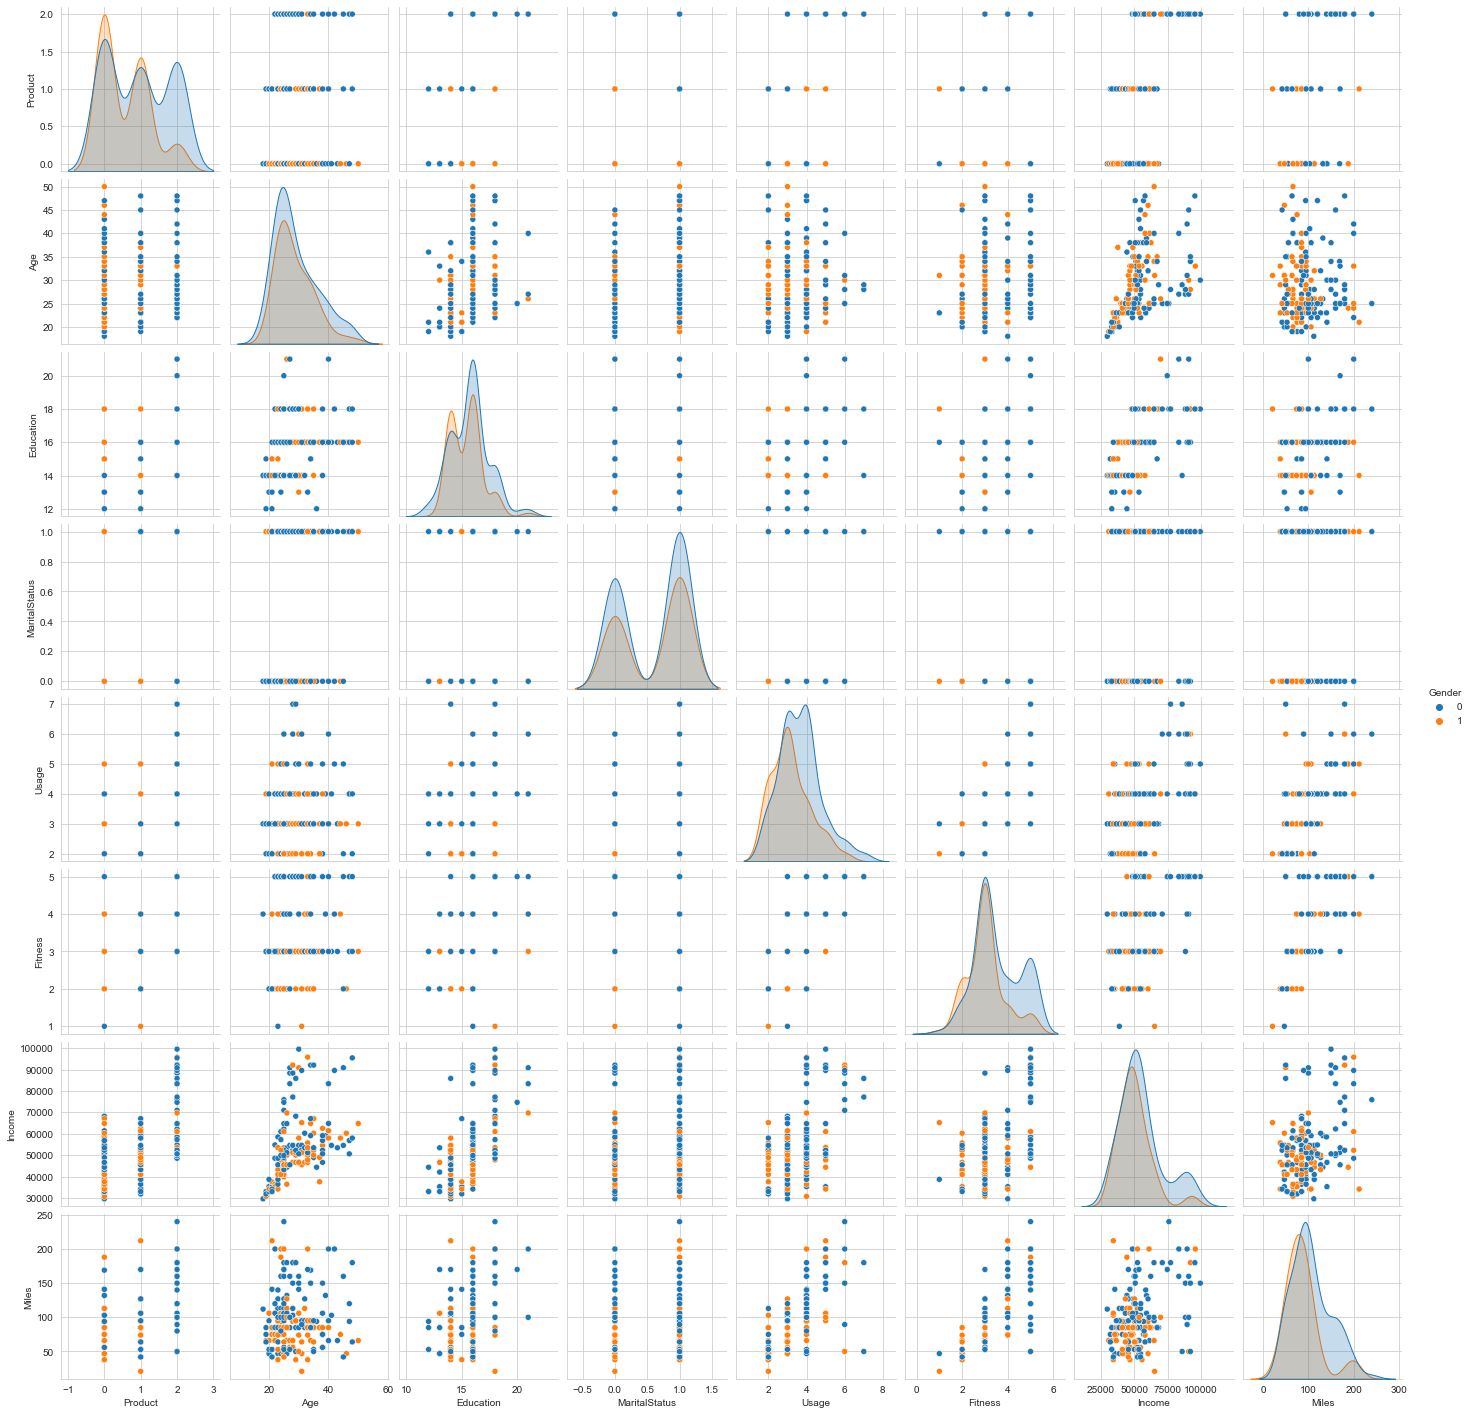

In [129]:
sns.pairplot(data_manip, hue="Gender")

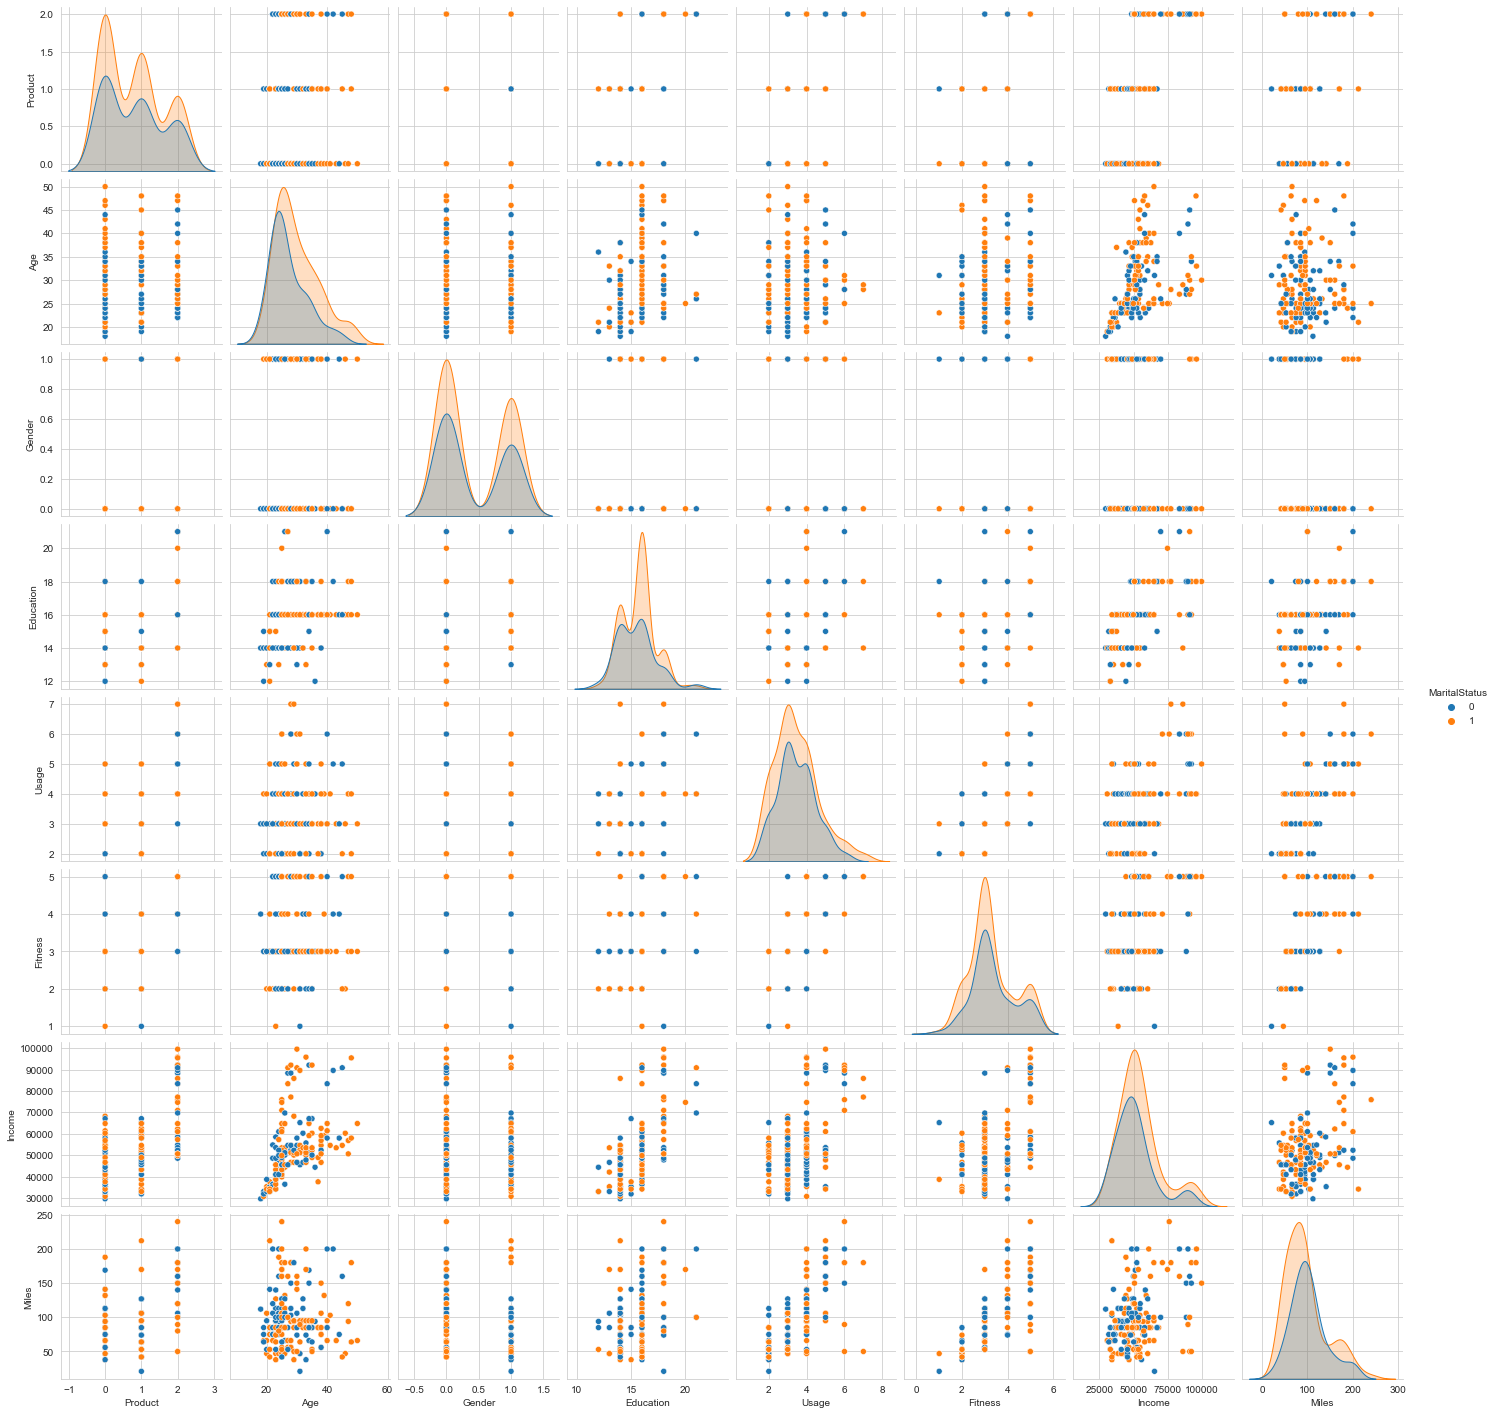

In [130]:
sns.pairplot(data_manip, hue="MaritalStatus")

There do not seem to be any strong/general clustering in the correlations between the variables when separated by Gender or Marital Status. Looking in more detail: 

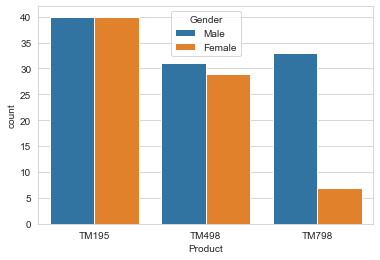

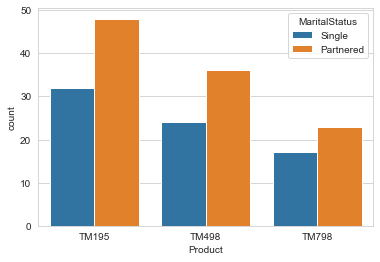

In [122]:
for t in ['Gender','MaritalStatus']:
    sns.countplot(data=raw_data,x='Product',hue=t)
    plt.show()

There is a very notable changes in product sales when it compares between gender and marital status. It would be interesting to further elucidate these changes as they compare to income, specifically for the third product (TM798).

Text(0.5, 1.0, 'Mean annual income for pairwise comparisons of Products and Gender')

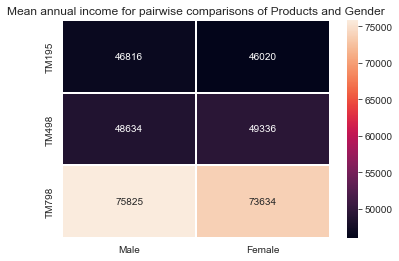

In [164]:
gender = raw_data['Gender'].unique()
product = raw_data['Product'].unique()
pgi = pd.DataFrame(columns=gender,index = product,dtype='float')
for g in gender:
    for p in product:
        value = raw_data[(raw_data['Product']==p)&(raw_data['Gender']==g)]['Income'].mean()
        pgi.at[p,g]=value

sns.heatmap(pgi,annot=True,fmt=".0f",linewidths=0.3)
plt.title('Mean annual income for pairwise comparisons of\n Products and Gender')

Text(0.5, 1.0, 'Mean annual income for pairwise comparisons of\n Products and Marital Status')

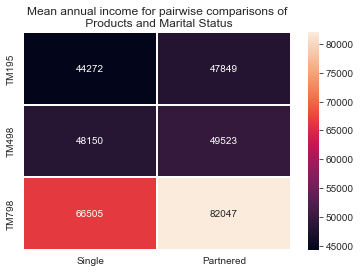

In [167]:
mstatus = raw_data['MaritalStatus'].unique()
product = raw_data['Product'].unique()
pmi = pd.DataFrame(columns=mstatus,index = product,dtype='float')
for m in mstatus:
    for p in product:
        value = raw_data[(raw_data['Product']==p)&(raw_data['MaritalStatus']==m)]['Income'].mean()
        pmi.at[p,m]=value
sns.heatmap(pmi,annot=True,fmt=".0f",linewidths=0.3)
plt.title('Mean annual income for pairwise comparisons of\n Products and Marital Status')

Text(0.5, 1.0, 'Mean annual income for pairwise comparisons of\n Gender and Marital Status')

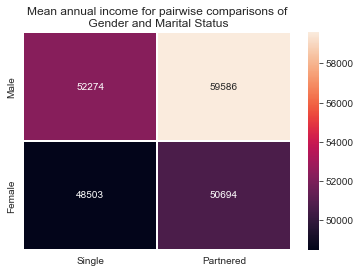

In [166]:
mstatus = raw_data['MaritalStatus'].unique()
gender = raw_data['Gender'].unique()
gmi = pd.DataFrame(columns=mstatus,index = gender,dtype='float')
for m in mstatus:
    for g in gender:
        value = raw_data[(raw_data['Gender']==g)&(raw_data['MaritalStatus']==m)]['Income'].mean()
        gmi.at[g,m]=value
sns.heatmap(gmi,annot=True,fmt=".0f",linewidths=0.3)
plt.title('Mean annual income for pairwise comparisons of\n Gender and Marital Status')

Text(0.5, 1.0, 'Mean annual income for pairwise comparisons of\n Gender and Marital Status of TM798 customers')

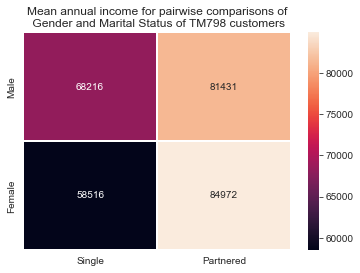

In [168]:
mstatus = raw_data['MaritalStatus'].unique()
gender = raw_data['Gender'].unique()
gmi = pd.DataFrame(columns=mstatus,index = gender,dtype='float')
for m in mstatus:
    for g in gender:
        value = raw_data[(raw_data['Gender']==g)&(raw_data['MaritalStatus']==m)&(raw_data['Product']=='TM798')]['Income'].mean()
        gmi.at[g,m]=value
sns.heatmap(gmi,annot=True,fmt=".0f",linewidths=0.3)
plt.title('Mean annual income for pairwise comparisons of\n Gender and Marital Status of TM798 customers')

## Take-aways

#### Analysis of customer base:
Their market seems to primarily consist of young adults (20-30 years old) with generally median incomes (~50k) who are looking to have a generally healthy lifestyle within relationships. The latter statement was based on a reported usage of 2, 3 or 4 days out of the week for around 85% of users, which correlated to an average self-evaluation score of 3 out of 5 for more than half of the users.
However, when looking at their three products certain patterns emerge that are worth looking into closely. Their TM798 model seems to be their least selling item (accounting for around only a fifth of total sales) yet it is preferred by the users that rated themselves highest on fitness as well as the highest expectation of usage. Furthermore, if I had to guess this product would seem to be the most expensive model, given that its rate of purchase coincides with users with the highest income. To reaffirm that this indication was not coincidental with other parameters that affect income, a multivariate analysis was also performed with gender and marital status (age was removed from this analysis as for all three products, customers were primarily young). While there were some minor fluctuations in mean income for genders and marital status, highest incomes for either gender or marital status gravitated mostly to the third product.

Furthermore, it is telling that this product is also more popular with users with the highest level of education. This means that they would most likely do due diligence to research to product when deciding to invest. Given that most of their customers earn median income, I don’t suspect that customers are drawn to the brand by luxury, but rather by quality. This type of customer behavior would imply that this product pertains to a notable brand who is known for quality performance, but customers are looking for a deal since their expectation of usage may not warrant the investment for the flagship product (which I assume is the TM798).


#### Recommendation to increase profits:
Focus marketing on the third product. They consistently perform well with partnered customers so marketing presenting couples working out together or appealing to that population would continue to do well. However, regarding the individual products, TM195 and TM498 seem to do comparably well between male and female customers, yet for the 3rd product there is a steep drop in female customers without any change in sales to male customers, and without any notable change in income for the female customers purchasing TM798. Furthermore, female customers purchasing this product still earned more than individuals that were single that purchased TM798. Finally, customers earning the lowest (single females) that purchased this product were only earning 58k, while highest earning customers (partnered males) were earning +80k. This suggests that there is a market for female customers earning higher salaries. Given that this product is the one purchased by customers with the highest likelihood of researching the quality of a product and having the means to get it, I would adjudicate this drop to how the product is being marketed. If properly educated customers that are highly fitness are primarily purchasing this product across a varied incomes, it would be fair to conclude that the female is a sector that should be marketed more aggressively towards.